# 4. Filtering - 필터링

## 1) Understanding to filtering - 필터링 이해하기
<hr>

- 영상의 필터링(Image filtering)
    - 영상에서 필요한 정보만 통과시키고 원치 않는 정보는 걸러내는 작업
<hr>

- 주파수 공간에서의 필터링(Filtering in frequency domain)
    - 저주파 성분 : 부드러운 성분
    - 고주파 성분 : 픽셀 값이 급격하게 자주 바뀌는 성분
    - `i.e.,` OpenCV 에서는 기본적으로 공간적 필터링을 사용하는데,<br>
경우에 따라서 주파수 공간에서의 필터링도 사용한다.<br>
`e.g.,` 영상의 사이즈나 내가 사용하려는 필터의 크기가 상당히 커질 경우에는 OpenCV 내부에서<br>
주파수 공간에서의 필터링을 자동으로 해준다.
<hr>

- 공간적 필터링(Filtering in Spatial domain)
    - 영상의 픽셀 값을 직접 이용하는 필터링 방법
        - 대상 좌표의 픽셀 값과 주변 픽셀 값을 동시에 사용
    - 주로 마스크(mask) 연산을 이용함
        - 마스크 = 커널(kernel) = 윈도우(window) = 템플릿(template)
<hr>

- 필터링 : 마스크 연산
    - 다양한 모양과 크기의 마스크를 만들수 있다.
    - 마스크의 형태와 값에 따라 필터의 역할이 결정됨
        - 영상 부드럽게 만들기
        - 영상 날카롭게 만들기
        - 에지(edge) 검출
        - 잡음(noise) 제거
<hr>

- 마스크 연산 수행 과정(3 x 3 크기의 마스크)

$$\text{Correlation(Convolution)}\begin{cases}\begin{align}g(x, y)
=\ & m(0, 0)\cdot f(x-1, y-1)\\
+\ & m(1, 0)\cdot f(x, y-1)\\
+\ & m(2, 0)\cdot f(x+1, y-1)\\
+\ & m(0, 1)\cdot f(x-1, y)\\
+\ & m(1, 1)\cdot f(x, y)\\
+\ & m(2, 1)\cdot f(x+1, y)\\
+\ & m(0, 2)\cdot f(x-1, y+1)\\
+\ & m(1, 2)\cdot f(x, y+1)\\
+\ & m(2, 2)\cdot f(x+1, y+1)
\end{align}\end{cases}$$

$$g(x, y) = \sum_{j=0}^{2}\sum_{i=0}^{2} m(i, j)\cdot f(x+i-1, y+j-1)$$

- 마스크 연산 수행 과정(m x n 크기의 마스크)

$$\text{Correlation(Convolution)}\begin{cases}\begin{align}g(x, y)
=\ & k(0, 0)\cdot f(x-\frac{m-1}{2}, y-\frac{n-1}{2})\\
& \vdots \\
+\ & k(\frac{m-1}{2}, \frac{n-1}{2})\cdot f(x, y)\leftarrow {\color{RoyalBlue}\text{anchor}}\\
& \vdots \\
+\ & k(m-1, n-1)\cdot f(x+\frac{m-1}{2}, y+\frac{n-1}{2})
\end{align}\end{cases}$$

$$\begin{align}
g(x, y) =\ &\sum_{j=0}^{n-1}\sum_{i=0}^{m-1} k(i, j)\cdot f(x+i-\frac{m-1}{2}, y+j-\frac{n-1}{2})\\
g(x, y) =\ &\sum_{j=-b}^{b}\sum_{i=-a}^{a} k(i, j)\cdot f(x+i, y+j)\\
m=\ &2a+1(a\ge 1)\\
n=\ &2b+1(b\ge 1)\\
k=\ &\text{kernel}
\end{align}$$
<hr>

- 최외곽 픽셀 처리
    - 최외곽 바깥에 가상의 픽셀이 있다고 가정
<hr>

- OpenCV 필터링에서 지원하는 가장자리 픽셀 확장 방법

|Border Types 열거형 상수|설명|
|:-|:-|
|BORDER_CONSTANT|모두 0으로 확장|
|BORDER_REPLICATE|모두 최외곽 값으로 확장|
|BORDER_REFLECT|거울에 반사된 듯한 형태로 확장|
|BORDER_REPLECT_101|최외곽을 기준으로 대칭 형태로 확장|
|BORDER_REFLECT101|BORDER_REPLECT_101과 같음|
|BORDER_DEFAULT|BORDER_REPLECT_101과 같음|
<hr>

> `기본적인 2D 필터링 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}filter2D}(src, ddepth, kernel, dst={\color{green}None}, anchor, delta, borderType) \rightarrow dst}$$
- src : source. 입력 영상
- ddepth : desired depth. 출력 영상 데이터 타입. (`e.g.,` cv2.CV_8U, cv2.CV_32F, cv2.CV_64F)<br>
`-1을 지정하면` src와 같은 타입의 dst 영상을 생성한다.<br>
`i.e.,` uint8, float32와 같은 데이터 자료형은 numpy에서 사용하는 데이터 타입이기 때문에<br>
출력하려는 데이터 타입에 따라 그에 맞는 플래그 상수를 선언해줘야 한다.
- kernel : Correlation kernel or Convolution kernel. 실수형의 필터 마스크 행렬.<br>
`i.e.,` 일반적으로 3x3, 5x5크기의 필터 마스크 행렬을 주로 사용한다.
- anchor : 고정점 위치. `(-1, -1)이면 필터 중앙을 고정점으로 사용`한다. 기본값은 (-1, -1)
- delta : 추가적으로 더할 값
- borderType : 가장자리 픽셀 확장 방식
- dst : 출력 영상
- 참고사항
    - `cv2.filter2D() 함수`는 실제로 `Convolution(합성곱)`이 아닌 `Correlation(상관 관계)`를 계산한다.
    - 두 개의 용어가 혼용되어 사용되지만 정확하게는 `Convolution`이 아닌 `Correlation`이라는 것에 주목.

## 2) Blurring (1) : Mean filter - 블러링 (1) : 평균값 필터

<hr>

### Mean filter - 평균값 필터
<hr>

- 영상의 특정 좌표 값을 주변 픽셀 값들의 산술 평균으로 설정한다.
- 픽셀들 간의 그레이스케일 값 변화가 줄어들어 날카로운 에지가 무뎌지고,<br>
영상에 있는 잡음의 영향이 사라지는 효과
- 마스크의 크기가 커질수록 평균값 필터 결과가 더욱 부드러워지지만 더 많은 연산량이 필요하다.
<hr>

> `평균값 필터링 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}blur}(src, ksize, dst={\color{green}None}, anchor, borderType) \rightarrow dst}$$
- src : source. 입력 영상
- ksize : kernel size. 평균값 필터 크기. (width, height) 형태의 튜플
- anchor : 고정점 위치. `(-1, -1)이면 필터 중앙을 고정점으로 사용`한다. 기본값은 (-1, -1)
- borderType : 가장자리 픽셀 확장 방식
- dst : destination. 결과 영상. 입력 영상과 같은 크기 & 같은 타입
$$\text{kernel} = \frac{1}{\text{ksize.width}\times \text{ksize.height}}$$

In [ ]:
import cv2
help(cv2.filter2D)

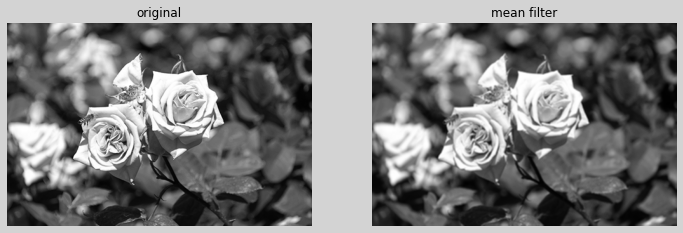

In [6]:
# Mean filtering example using filter2D() function - filter2D() 함수를 이용한 평균값 필터링 예제
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("images/rose.bmp", cv2.IMREAD_GRAYSCALE)

kernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
    ])

destination = cv2.filter2D(source, -1, kernel)

# pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="lightgray")

plt.subplot(121, title="original").axis("off")
plt.imshow(source, "gray")

plt.subplot(122, title="mean filter").axis("off")
plt.imshow(destination, "gray")

plt.show()

# OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
cv2.imshow("Mean filter", destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

In [ ]:
import cv2
help(cv2.blur)

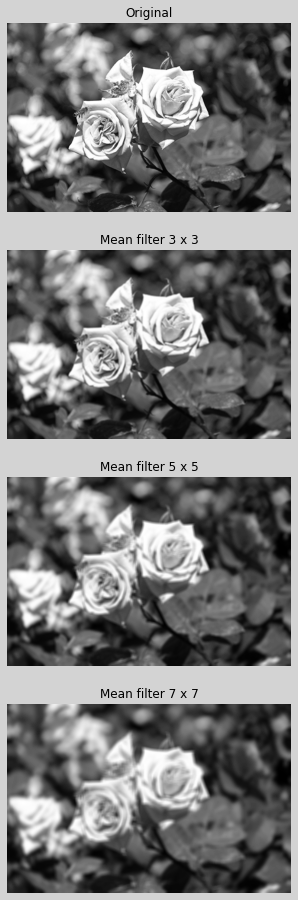

-1

In [8]:
# Mean filtering example using diverse kernel sizes of blur() function - 다양한 크기의 커널을 사용한 평균값 필터링 예제
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("images/rose.bmp", cv2.IMREAD_GRAYSCALE)

# pyplot으로 출력
plt.figure(figsize=(6, 16), facecolor="lightgray")

plt.subplot(411, title="Original").axis("off")
plt.imshow(source, "gray")

for index, kernel_size in enumerate([3, 5, 7]):
    destination = cv2.blur(source, (kernel_size, kernel_size))
    description = f"Mean filter {kernel_size} x {kernel_size}"
    plt.subplot(4, 1, index + 2, title=description).axis("off")
    plt.imshow(destination, "gray")

plt.show()

# OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
for kernel_size in [3, 5, 7]:
    destination = cv2.blur(source, (kernel_size, kernel_size))
    description = f"Filter size : {kernel_size} x {kernel_size}"
    cv2.putText(img=destination,
                text=description,
                org=(10, 30),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1.0,
                color=255,
                thickness=1,
                lineType=cv2.LINE_AA  # Anti-Aliasing
                )
    cv2.imshow("Mean filter", destination)
    cv2.waitKey()

cv2.destroyAllWindows()
cv2.waitKey(1)

## 3) Blurring (2) : Gaussian filter - 블러링 (2) : 가우시안 필터

### Gaussian filtering - 가우시안 필터링
<hr>

- 평균값 필터에 의한 블러링의 단점
    - 필터링 대상 위치에서 가까이 있는 픽셀과 멀리 있는 픽셀이 모두 같은 가중치를 사용하여 평균을 계산
    - 멀리 있는 픽셀의 영향을 많이 받을 수 있다.
- 평균값 필터링과 가우시안 필터링 비교
    - 평균값 필터 : 가까운 픽셀과 멀리 있는 픽셀이 같은 가중치를 사용하여 평균 계산
    - 가우시안 필터 : 가까운 픽셀은 큰 가중치를, 멀리 있는 픽셀은 작은 가중치를 사용하여 평균 계산
<hr>

- (1차원) 가우시안 함수 (Gaussian function)
$$G_{\mu,\sigma}(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
<hr>

- 가우시안 함수의 특징
    - 평균값(Mean)을 기준으로 좌우 대칭이다.
    - ±1σ 까지는 전체의 68% 밀도를 차지하고 있고, 순서대로 ±2σ = 95%, ±3σ = 99.7%를 차지하고 있다.
    - 이 곡선은 확률밀도함수이기 때문에 모든 구간에 대한 정적분 값은 1이다.
<hr>

- (2차원) 가우시안 함수 (Gaussian function)
$$G_\sigma (x, y) = \frac{1}{2\pi \sigma^2} e^{(-\frac{x^2+y^2}{2\sigma^2})}
\begin{cases}
\mu_x = \mu_y = 0 \\ 
\sigma_x = \sigma_y = \sigma
\end{cases}$$
<hr>

- 2차원 가우시안 필터 마스크 (σ = 1.0)
    - 필터 마스크 크기 : `(8σ + 1)` 또는 `(6σ + 1)`
    - OpenCV 에서는 uint8을 사용하는 영상에 대해서는 `(6σ + 1)`을,
    - float 타입은 `(8σ + 1)`정도의 가우시안 필터를 만들어 사용한다.
<hr>

> `가우시안 필터링 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}GaussianBlur}(src, ksize, sigmaX, dst={\color{green}None}, sigmaY, borderType) \rightarrow dst}$$
- src : source. 입력 영상. 각 채널 별로 처리된다.
- dst : destination. 출력 영상. src와 같은 크기, 같은 타입
- ksize : kernel size. 가우시안 필터 크기. `(0, 0)을 지정하면 sigma 값에 의해 자동 결정된다.(권장사항)`
- sigmaX : x방향 sigma.
- sigmaY : y방향 sigma. 0이면 sigmaX와 같게 설정된다. 기본값은 0
- borderType : 가장자리 픽셀 확장 방식.
- 참고사항:
    - sigmaX, sigmaY가 모두 0이면 ksize 크기로부터 sigma값이 계산된다.

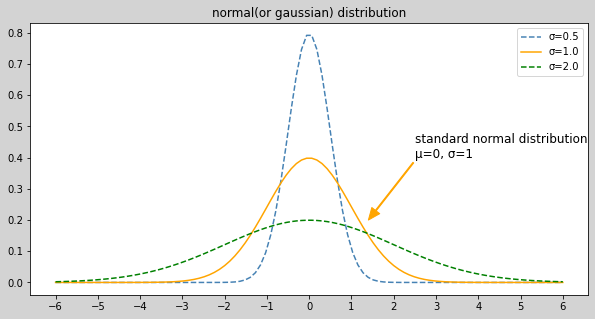

In [48]:
from IPython.display import Image
Image("images/1D_gaussian_graph.png")  # 1D Gaussian graph(with standard normal distribution)

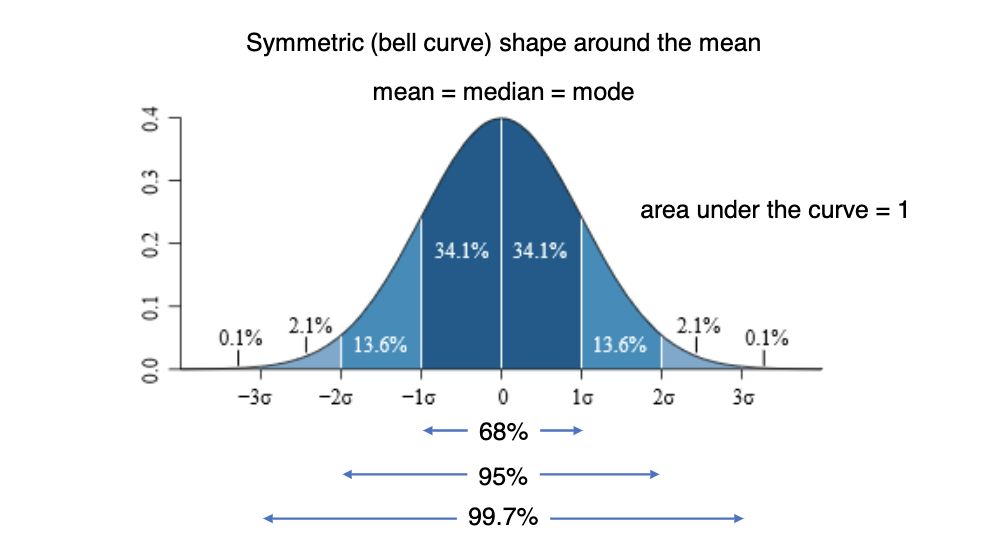

In [49]:
from IPython.display import Image
Image("images/gaussian_function_features.png")  # Features of gaussian function

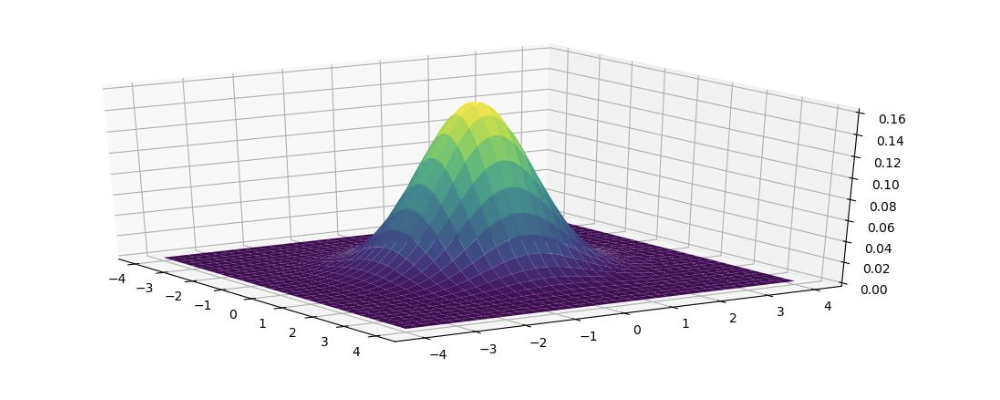

In [50]:
from IPython.display import Image
Image("images/2D_gaussian_graph.png")  # 2D Gaussian graph

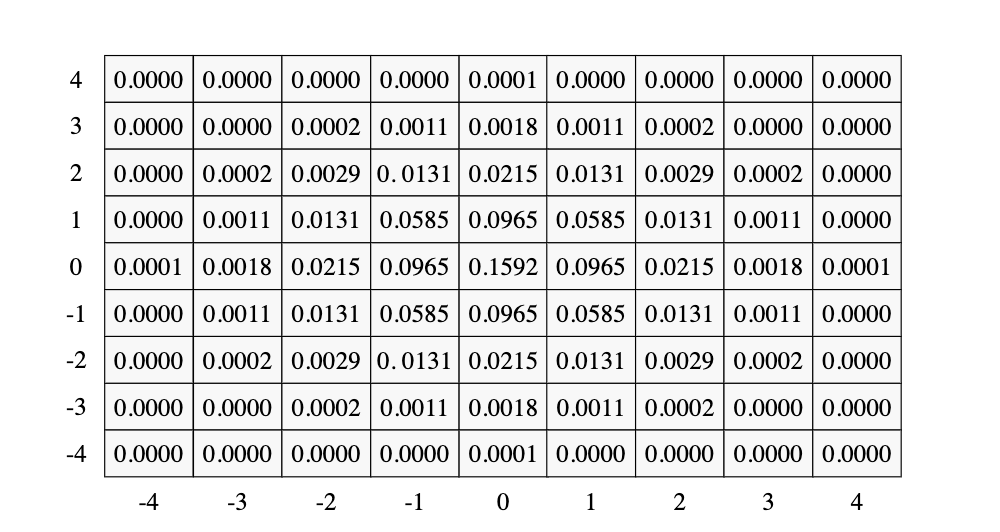

In [51]:
from IPython.display import Image
Image("images/2D_gaussian_filter_mask.png")  # mask of 2D gaussian filter(8σ + 1)

In [4]:
# # 가우시안 분포표 만들어서 이미지로 저장하기
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.stats import norm

# plt.figure(figsize=(10, 5), facecolor="lightgray")
# plt.subplot(title="normal(or gaussian) distribution")
# plt.xticks(ticks=np.arange(-6, 7, 1))
# colors = ["steelblue", "orange", "green"]
# for sigma, color_ in zip([0.5, 1.0, 2.0], colors):
#     x = np.linspace(-6, 6, 100)
#     y = norm.pdf(x, 0, sigma)
    
#     if sigma == 1.0:
#         plt.plot(x, y, color=color_, label=f"σ={sigma}")
#         continue
#     plt.plot(x, y,"--", color=color_, label=f"σ={sigma}")
# plt.legend()

# # 범주 배경 & 텍스트 색상
# # legend = plt.legend(facecolor="white")
# # plt.setp(legend.get_texts(), color="black")

# arrowprops_ = {"color":"orange", "width":1, "headwidth":10}  # 화살표 속성

# plt.annotate('standard normal distribution\nμ=0, σ=1',
#              xy=(1.4, 0.2),  # annotate start points
#              xytext=(2.5, 0.4),  # text start points
#              fontsize=12,
#              color="black",  # text color
#              arrowprops=arrowprops_)
# plt.show()

In [ ]:
import cv2
help(cv2.GaussianBlur)

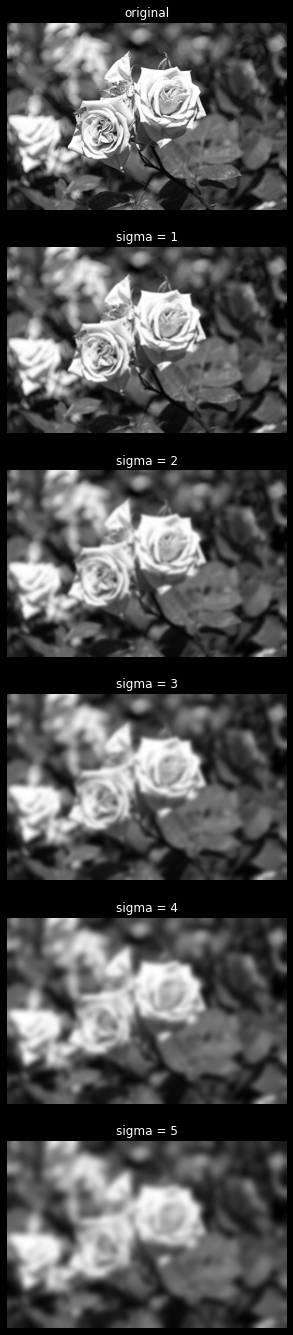

-1

In [27]:
# Gaussian distribution filtering using sigma of diverse sizes - 다양한 크기의 sigma를 사용한 가우시안 분포 필터링
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("images/rose.bmp", cv2.IMREAD_GRAYSCALE)

# pyplot으로 출력
plt.figure(figsize=(6, 24), facecolor="lightgray")

plt.subplot(611, title="Original").axis("off")
plt.imshow(source, "gray")

for sigma in range(1, 6):
    destination = cv2.GaussianBlur(source, (0, 0), sigma)
    description = f"Sigma = {sigma}"
    plt.subplot(6, 1, sigma + 1, title=description).axis("off")
    plt.imshow(destination, "gray")
    
plt.show()

# OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
for sigma in range(1, 6):
    destination = cv2.GaussianBlur(source, (0, 0), sigma)
    description = f"Sigma = {sigma}"
    cv2.putText(
        img=destination,
        text=description,
        org=(10, 30),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=1.0,
        color=255,
        thickness=1,
        lineType=cv2.LINE_AA  # Anti-Aliasing
        )
    cv2.imshow("destination", destination)
    cv2.waitKey()

cv2.destroyAllWindows()
cv2.waitKey(1)

## 4) Sharpning : Unsharp mask filter - 샤프닝 : 언샤프 마스크 필터
<hr>

- 언샤프 마스크(Unsharp mask) 필터링
    - 날카롭지 않은(unsharp) 영상 즉, 부드러워진 영상을 이용하여 날카로운 영상을 생성한다.

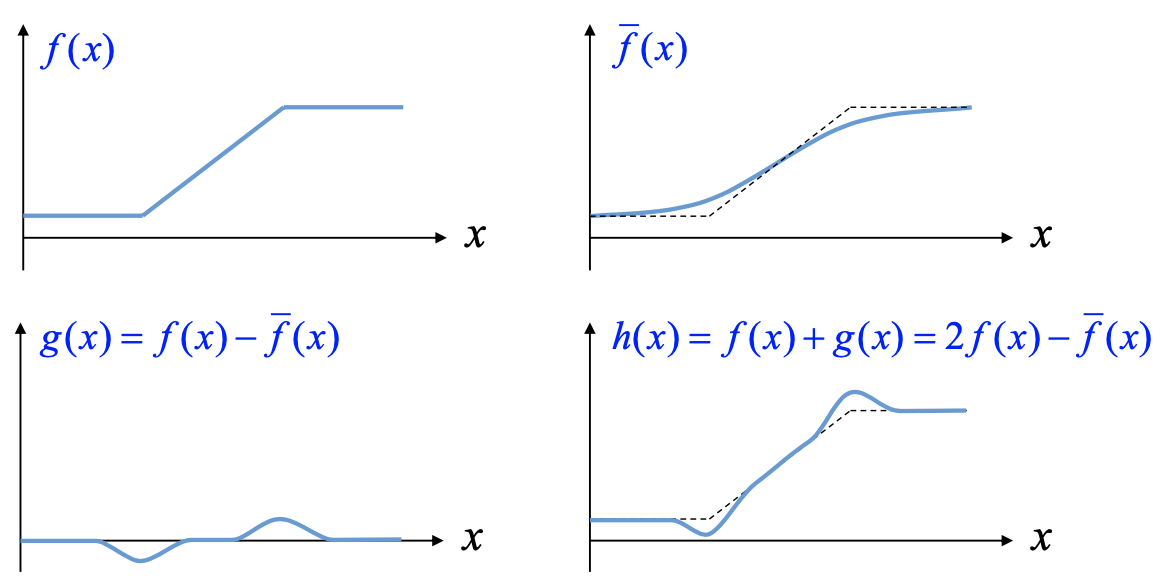

In [263]:
from IPython.display import Image
Image("images/unsharp_mask_process.png")  # Sharpning process using unsharp mask

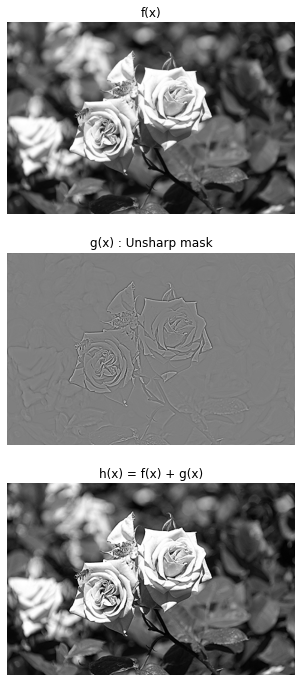

-1

In [8]:
# Unsharp mask implement 1 - 언샤크 마스크 구현하기 1
import cv2
import matplotlib.pyplot as plt
import numpy as np

fx = cv2.imread("images/rose.bmp", cv2.IMREAD_GRAYSCALE)

# 언샤프 마스크 필터링을 하기 전에 자료형을 float32으로 전환
fx_float = fx.astype(np.float32)

unsharped_fx = cv2.GaussianBlur(fx_float, (0, 0), 1.0)

gx = cv2.subtract(fx_float, unsharped_fx)  # Unsharp mask : fx와 unsharp의 함수값 차이

# 필터링이 끝나면 자료형을 uint8로 다시 전환한다.
hx = np.clip(fx_float + Gx, 0, 255).astype(np.uint8)  # Unsharp mask filtering

# pyplot으로 출력
plt.figure(figsize=(6, 12))
plt.subplot(311, title="f(x)").axis("off")
plt.imshow(fx, "gray")

plt.subplot(312, title="g(x) : Unsharp mask").axis("off")
plt.imshow(gx, "gray")

plt.subplot(313, title="h(x) = f(x) + g(x)").axis("off")
plt.imshow(hx, "gray")

plt.show()

# OpenCV 가상 윈도우로 출력
cv2.imshow("f(x)", fx)
cv2.imshow("g(x) : Unsharp mask", gx)
cv2.imshow("h(x) = f(x) + g(x)", hx)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

#### NOTE : numpy 패키지의 clip() 함수를 이용하여 언샤프 마스크를 구현할 때 수식을 그대로 구현할 수 있는 반면에 
#### 주의할 점은 uint8 타입으로 연산을 하게되면 연산 과정에서 미리 포화연산이 되어버려서 원활한 언샤프 마스크 필터링이
#### 이루어지지 않을 수 있다. 이를 막기위해 영상 데이터를 먼저 float 타입으로 교체 해줌으로써 미리 포화연산이
#### 되는 것을 막을수 있다. 그리고 영상 출력을 위해 마지막에 uint8 타입으로 교체해줘야 한다.

<hr>

### Unsharp mask filter implement - 언샤프 마스크 필터 구현하기(샤프닝 정도 추가하기)
<hr>

- 샤프닝 정도를 조절할 수 있도록 수식 변경
$$h(x, y) = f(x, y) + \alpha · g(x, y)$$
$$\Downarrow$$
$$\begin{align}h(x, y) & = f(x, y) + \alpha (f(x, y) - \overline{f}(x, y)) \\ 
& = (1 + \alpha)f(x, y) - \alpha · \overline{f}(x, y)\end{align}$$
$$\Downarrow$$
$$h(x, y) = (1 + \alpha)f(x, y) - \alpha · G_\sigma (f(x, y))$$

In [1]:
# Unsharp mask implement 2(Sharpning value control) - 언샤프 마스크 구현하기 2(샤프닝 정도 제어)
import cv2
import matplotlib.pyplot as plt
import numpy as np


def unsharp_mask_filtering(source, amount, radius):
    """Unsharp mask filtering process

    Args:
        source (numpy.ndarray): [description]
        amount (int or float): Sharpning value
        radius (int or float): Sigma of cv2.GaussianBlur()

    Returns:
        numpy.ndarray: Sharped image array after unsharp mask filtering.
    """
    
    unsharped_image = cv2.GaussianBlur(source, (0, 0), radius)
    
    filtering = cv2.addWeighted(source, (1 + amount), unsharped_image, -amount, 0)
    
    return filtering


fx = cv2.imread("images/rose.bmp", cv2.IMREAD_GRAYSCALE)

hx = unsharp_mask_filtering(fx, 1, 2)

# OpenCV 가상 윈도우로 출력
cv2.imshow("f(x)", fx)
cv2.imshow("h(x)", hx)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

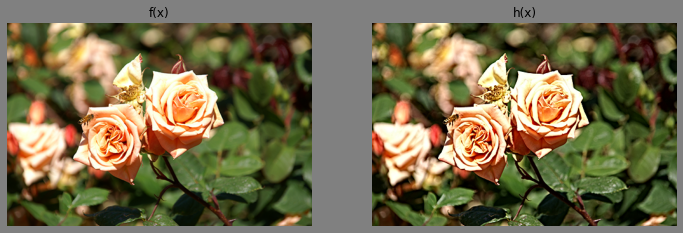

-1

In [37]:
# Unsharp mask implement about color images 1 - 컬러 영상에 대한 언샤프 마스크 구현하기 1
import cv2
import matplotlib.pyplot as plt
import numpy as np

fx = cv2.imread("images/rose.bmp")

fx_YCrCb = cv2.cvtColor(fx, cv2.COLOR_BGR2YCrCb)

# 소수점 이하의 차이를 줄이기 위해 자료형 변환
fx_float = fx_YCrCb[:, :, 0].astype(np.float32)

unsharped_fx = cv2.GaussianBlur(fx_float, (0, 0), 3)

# Y평면에만 필터링 적용
fx_YCrCb[:, :, 0] = np.clip(2.0 * fx_float - unsharped_fx, 0, 255)

hx = cv2.cvtColor(fx_YCrCb, cv2.COLOR_YCrCb2BGR)

# pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="gray")

plt.subplot(121, title="f(x)").axis("off")
plt.imshow(fx[:, :, ::-1])

plt.subplot(122, title="h(x)").axis("off")
plt.imshow(hx[:, :, ::-1])

plt.show()

# OpenCV 가상 윈도우로 출력
cv2.imshow("f(x)", fx)
cv2.imshow("h(x)", hx)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

#### NOTE : "넘파이 슬라이싱 방법으로 하나의 색 평면만을 필터링하면 왜 데이터 자료형을 자동으로 uint8로 바꿔주는지
#### 의문이다. NumPy 혹은 OpenCV 공식문서를 참고해봐야 함." -> 해결됨.
#### "np.clip(2.0 * Fx_float - unsharp, 0, 255)" 까지는 float32 자료형으로 연산되고,
#### "Fx_YCrCb[:, :, 0]" 에 담겨질 때 uint8 자료형으로 자동 변환되어 할당된다.
#### 왜냐하면 "Fx_YCrCb" 에 담겨 있는 이미지 행렬은 uint8 자료형이기 때문이다.
#### 그렇다면 '왜 float32 자료형으로 바꾸어서 언샤프 마스크 필터링 연산을 해야하나?' 라고 물어본다면,
#### 16번째 코드 라인에서 numpy의 clip() 함수를 사용하여 언샤프 마스크 필터링을 구현할 때 "2.0 * Fx_float"
#### 부분에서 만약 "Fx_float"이라는 이미지 행렬이 uint8 자료형이라면 미리 포화연산이 진행되기 때문에 원하는
#### 결과를 얻을 수 없기 때문에 필터링 연산을 하기 전에 먼저 float32 자료형으로 바꿔준 것이다.

In [ ]:
# Unsharp mask implement about color images 2(sharpning value control) - 컬러 영상에 대한 언샤프 마스크 구현하기 2(샤프닝 정도 제어)
import cv2
import matplotlib.pyplot as plt
import numpy as np


def unsharp_mask_filtering_color(source, amount, radius):
    """Unsharp mask filtering process

    Args:
        source (numpy.ndarray): [description]
        amount (int or float): Sharpning value
        radius (int or float): Sigma of cv2.GaussianBlur()

    Returns:
        numpy.ndarray: Sharped image array after unsharp mask filtering.
    """
    
    source_YCrCb = cv2.cvtColor(source, cv2.COLOR_BGR2YCrCb)
    
    unsharped_image = cv2.GaussianBlur(source_YCrCb[:, :, 0], (0, 0), radius)
    
    # (1 + alpha)f(x) - alpha x UnsharpedImage
    source_YCrCb[:, :, 0] = cv2.addWeighted(source_YCrCb[:, :, 0], (1 + amount), unsharped_image, -amount, 0)
    
    destination = cv2.cvtColor(source_YCrCb, cv2.COLOR_YCrCb2BGR)
    
    return destination


fx = cv2.imread("images/rose.bmp")

hx = unsharp_mask_filtering_color(fx, 2, 2)

# OpenCV 가상 윈도우로 출력
cv2.imshow("f(x)", fx)
cv2.imshow("h(x)", hx)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## 5) Noise remove(1) : Median filter - 잡음 제거(1) : 미디언 필터

### Noise of image - 영상의 잡음
<hr>

- 영상의 잡음(Noise)
    - 영상의 픽셀 값에 추가되는 원치 않는 형태의 신호
$$f(x, y)=s(x, y)+n(x, y)$$
$$f=\text{dst},\ s=\text{src},\ n=\text{noise}$$
<hr>

- 잡음의 종류
    - 가우시안 잡음(Gaussian noise)
    - 소금 & 후추 잡음(Salt & pepper)

<hr>

### Median filter - 중앙값(중위수) 필터
<hr>

- 주변 픽셀들의 값들을 정렬하여 그 중앙값(Median)으로 픽셀 값을 대체한다.
- 소금-후추 잡음 제거에 효과적이다.
<hr>

> `미디언 필터링 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}medianBlur}(src, ksize, dst={\color{green}None}) \rightarrow dst}$$
- src : source. 입력 영상. 각 채널별로 처리된다.
- ksize : kernel size. 커널 크기. 1보다 큰 홀수를 지정한다.<br>
e.g., 3 = 3x3, 5 = 5x5, 7 = 7x7, 9 = 9x9 ...
- dst : destination. 출력 영상. src와 같은 크기, 같은 타입

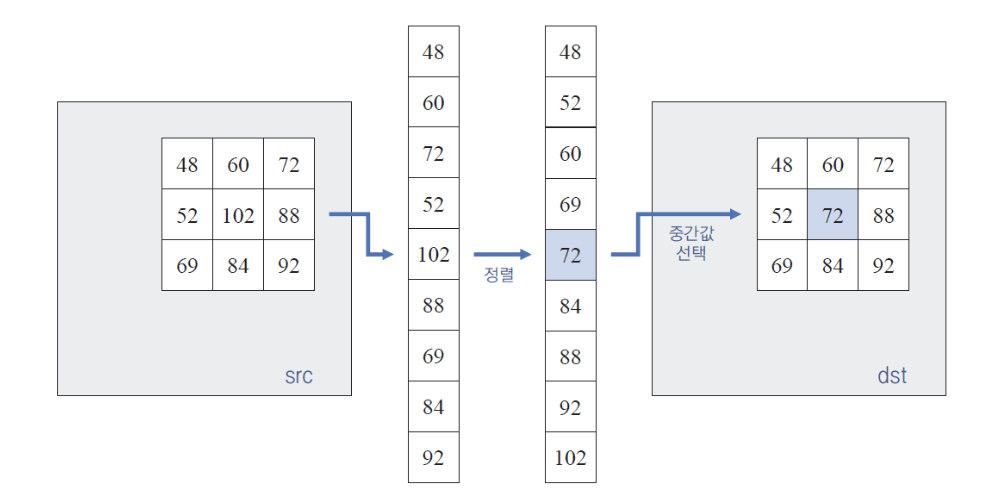

In [43]:
from IPython.display import Image
Image("images/median_filter.png")

In [ ]:
import cv2
help(cv2.medianBlur)

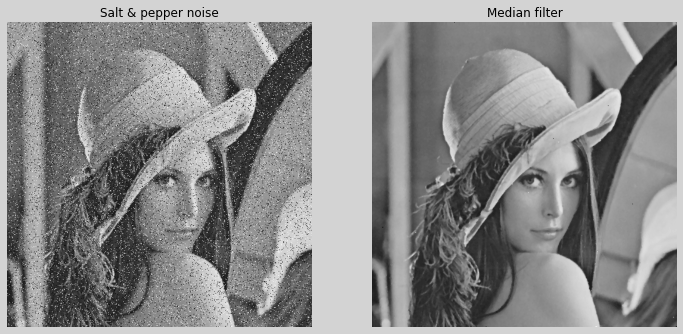

In [53]:
# Salt & pepper noise removal example using median filter - 미디언 필터를 사용한 소금 & 후추 잡음 제거 예제
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("images/noise.bmp", cv2.IMREAD_GRAYSCALE)

destination = cv2.medianBlur(source, 3)

# pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="lightgray")

plt.subplot(121, title="Salt & pepper noise").axis("off")
plt.imshow(source, "gray")

plt.subplot(122, title="Median filter").axis("off")
plt.imshow(destination, "gray")

plt.show()

# OpenCV 가상 윈도우로 출력
cv2.imshow("salt & pepper noise", source)
cv2.imshow("Median filter", destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

### Gaussian filter - 가우시안 필터
<hr>

- 가우시안 잡음 제거에는 가우시안 필터가 효과적이다.

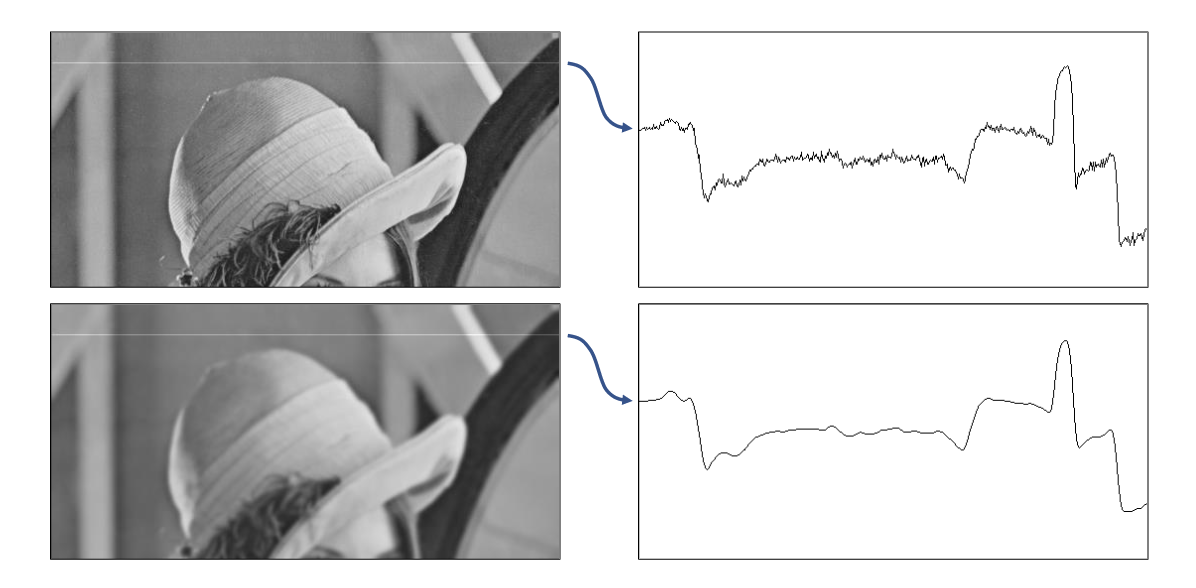

In [54]:
from IPython.display import Image
Image("images/gaussian_noise_removal.png")  # Gaussian noise removal

<hr>

### Bilateral filter - 양방향 필터
<hr>

- 에지 보전 잡음 제거 필터(edge-preserving noise removal filter)의 하나이다.
- 평균값 필터 또는 가우시안 필터는 에지 부근에서도 픽셀 값을 평탄하게 만드는 단점이 존재한다.
- 기준 픽셀과 이웃 픽셀과의 거리, 그리고 픽셀 값의 차이를 함께 고려하여 블러링 정도를 조절한다.
$$BF[I]_P = \frac{1}{W_P}\sum_{q\in S}G_{\sigma_s}(\| p-q\|)G_{\sigma_r}(| I_p - I_q|)I_q$$
<hr>

- 가우시안 필터와 양방향 필터 비교
    - (일반적인) 가우시안 필터링 : 영사 전체에서 blurring
    - 양방향 필터 : 에지가 아닌 부분에서만 blurring
<hr>

> `양방향 필터링 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}bilateralFilter}(src, d, sigmaColor, sigmaSpace, dst={\color{green}None}, borderType) \rightarrow dst}$$
- src : source. 입력 영상. 8비트 또는 실수형, 1채널 또는 3채널
- d : distance. 필터링에 사용될 이웃 픽셀의 거리(지름)<br>
`음수(-1)`를 입력하면 `sigmaSpace 값에 의해 자동 결정된다.(권장 사항)`
- sigmaColor : 색 공간에서 필터의 표준 편차<br>
`i.e.,` `edge와 edge가 아닌 픽셀을 구분 짓는 기준`이라 생각하자.
- sigmaSpace : 좌표 공간에서 필터의 표준 편차<br>
`i.e.,` 가우시안 필터의 sigma와 완전히 같은 개념이다.
- dst : destination. 출력 영상. src와 같은 크기, 같은 타입
- borderType : 가장자리 픽셀 처리 방식

In [ ]:
import cv2
help(cv2.bilateralFilter)

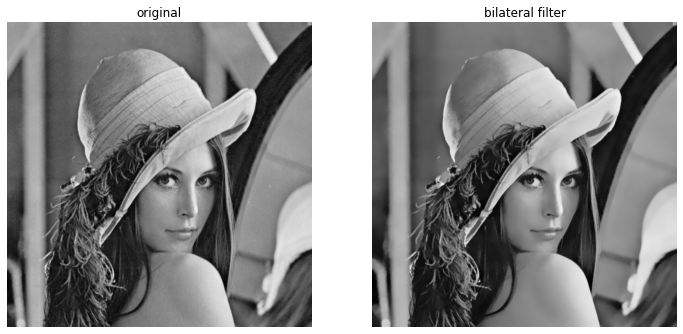

-1

In [41]:
### Bilateral filter implement - 양방향 필터 구현하기
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("images/lenna.bmp", cv2.IMREAD_GRAYSCALE)

destination = cv2.bilateralFilter(source, -1, 10, 5)

## pyplot으로 출력
plt.figure(figsize=(12, 6))

plt.subplot(121, title="original").axis("off")
plt.imshow(source, "gray")

plt.subplot(122, title="bilateral filter").axis("off")
plt.imshow(destination, "gray")

plt.show()

## OpenCV 가상 윈도우로 출력
cv2.imshow("source", source)
cv2.imshow("destination", destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## 7) Cartoon filter camera - 카툰 필터 카메라
<hr>

- 카메라 입력 영상에 실시간으로 재미있는 필터링을 적용하는 기능
<hr>

- 구현할 기능
    - 카툰 필터
        - 입력 영상의 색상을 단순화 시키고, 에지 부분을 검정색으로 강조한다.
    - 스케치 필터
        - 평탄한 영역은 흰색
        - 에지 근방에서 어두운 영역을 검정색으로 설정한다.(밝은 영역은 흰색)
    - 스페이스바를 누를 때마다 모드 변경

In [42]:
### Project : Cartoon filter camera implement - 프로젝트 : 카툰 필터 구현하기
import sys

import cv2
import matplotlib.pyplot as plt

# Constant
CAM_MODE = 0


def convert_cartoon_filter(image):
    h, w = image.shape[:2]
    image_resize = cv2.resize(image, (w//2, h//2))

    blur = cv2.bilateralFilter(image_resize, -1, 20, 5)

    edge = 255 - cv2.Canny(image_resize, 65, 105)
    edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

    destination = cv2.bitwise_and(blur, edge)
    destination = cv2.resize(destination, (w, h), interpolation=cv2.INTER_NEAREST)

    return destination


def convert_sketch_filter(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blur = cv2.GaussianBlur(image_gray, (0, 0), 5)

    destination = cv2.divide(image_gray, blur, scale=255)
    destination = cv2.cvtColor(destination, cv2.COLOR_GRAY2BGR)

    return destination


capture = cv2.VideoCapture(0)

if not capture.isOpened():
    print("Video open failed!")
    sys.exit()

while True:
    retval, frame = capture.read()

    if not retval:
        break

    if CAM_MODE == 1:
        frame = convert_cartoon_filter(frame)
    elif CAM_MODE == 2:
        frame = convert_sketch_filter(frame)

    cv2.imshow("frame", frame)
    key = cv2.waitKey(1)

    if key == 27:
        break
    elif key == ord(" "):
        CAM_MODE += 1
        if CAM_MODE == 3:
            CAM_MODE = 0

capture.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1